In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import datetime
from datetime import timedelta

In [9]:
weather_data_file = pd.read_csv('weather-data-2013-2017.csv')
df = pd.DataFrame(weather_data_file)
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1356998400,2013-01-01 00:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,37.33,31.33,34.76,37.99,...,210,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
1,1357002000,2013-01-01 01:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.95,30.15,34.90,37.94,...,170,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
2,1357005600,2013-01-01 02:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.84,28.78,34.82,37.94,...,190,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
3,1357009200,2013-01-01 03:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.34,29.98,33.80,37.40,...,180,0.5,0.65,NaN,NaN,90,500,Rain,light rain,10n
4,1357012800,2013-01-01 04:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,35.33,27.91,33.80,36.00,...,180,0.8,NaN,NaN,NaN,90,501,Rain,moderate rain,10n


In [24]:
# start stop and step variables
start, stop, step = 0, -22, 1

# converting to string data type 
df["dt_iso"]= df["dt_iso"].astype(str) 

# slicing till month element 
df["Date"]= df["dt_iso"].str.slice(start, stop, step) 

# display 
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,Date
0,1356998400,2013-01-01 00:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,37.33,31.33,34.76,37.99,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
1,1357002000,2013-01-01 01:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.95,30.15,34.90,37.94,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
2,1357005600,2013-01-01 02:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.84,28.78,34.82,37.94,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
3,1357009200,2013-01-01 03:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.34,29.98,33.80,37.40,...,0.5,0.65,NaN,NaN,90,500,Rain,light rain,10n,2013-01
4,1357012800,2013-01-01 04:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,35.33,27.91,33.80,36.00,...,0.8,NaN,NaN,NaN,90,501,Rain,moderate rain,10n,2013-01


In [25]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon', 'Date'],
      dtype='object')

In [26]:
data = df.rename(columns={"wind_deg": "Wind", "weather_icon": "weather_icon",
                                  "temp": "Temperature", "temp_min": "Minimum Temperature", "temp_max": "Maximum Temperature",
                                  "weather_description": "Weather Description", "clouds_all": "Clouds",
                         "wind_speed": "Wind Speed", "weather_icon": "Weather Icon"})

data.head()

,dt,dt_iso,timezone,city_name,lat,lon,Temperature,feels_like,Minimum Temperature,Maximum Temperature,...,rain_1h,rain_3h,snow_1h,snow_3h,Clouds,weather_id,weather_main,Weather Description,Weather Icon,Date
0,1356998400,2013-01-01 00:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,37.33,31.33,34.76,37.99,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
1,1357002000,2013-01-01 01:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.95,30.15,34.90,37.94,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
2,1357005600,2013-01-01 02:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.84,28.78,34.82,37.94,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2013-01
3,1357009200,2013-01-01 03:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,36.34,29.98,33.80,37.40,...,0.5,0.65,NaN,NaN,90,500,Rain,light rain,10n,2013-01
4,1357012800,2013-01-01 04:00:00 +0000 UTC,-18000,Louisville,38.252665,-85.758456,35.33,27.91,33.80,36.00,...,0.8,NaN,NaN,NaN,90,501,Rain,moderate rain,10n,2013-01


In [27]:
# data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45354 entries, 0 to 45353
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   45354 non-null  int64  
 1   dt_iso               45354 non-null  object 
 2   timezone             45354 non-null  int64  
 3   city_name            45354 non-null  object 
 4   lat                  45354 non-null  float64
 5   lon                  45354 non-null  float64
 6   Temperature          45354 non-null  float64
 7   feels_like           45354 non-null  float64
 8   Minimum Temperature  45354 non-null  float64
 9   Maximum Temperature  45354 non-null  float64
 10  pressure             45354 non-null  int64  
 11  sea_level            0 non-null      float64
 12  grnd_level           0 non-null      float64
 13  humidity             45354 non-null  int64  
 14  Wind Speed           45354 non-null  float64
 15  Wind                 45354 non-null 

In [29]:
data = data.drop(columns=['dt', 'dt_iso','timezone', 'city_name', 'lat', 'lon',
                          'pressure', 'sea_level', 'grnd_level', 'humidity',
                         'pressure','sea_level', 'grnd_level', 'humidity',
                         'rain_1h','rain_3h', 'snow_1h', 'snow_3h','weather_id', 'weather_main'])
data.head()

,Temperature,feels_like,Minimum Temperature,Maximum Temperature,Wind Speed,Wind,Clouds,Weather Description,Weather Icon,Date
0,37.33,31.33,34.76,37.99,3.36,210,90,overcast clouds,04n,2013-01
1,36.95,30.15,34.90,37.94,4.70,170,90,overcast clouds,04n,2013-01
2,36.84,28.78,34.82,37.94,6.93,190,90,overcast clouds,04n,2013-01
3,36.34,29.98,33.80,37.40,4.70,180,90,light rain,10n,2013-01
4,35.33,27.91,33.80,36.00,6.93,180,90,moderate rain,10n,2013-01


In [89]:
year_group = data.groupby("Date")['Temperature'].mean()
# year_group
mean_temp = pd.DataFrame(year_group).reset_index()
meantemp = mean_temp.rename(columns={'Temperature': 'Mean Temperature'})
meantemp.head()

,Date,Mean Temperature
0,2013-01,37.591626
1,2013-02,36.818135
2,2013-03,39.369218
3,2013-04,56.689571
4,2013-05,67.045632


In [90]:
meantemp['Mean Temperature'] = meantemp['Mean Temperature'].astype(np.int64)
meantemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              60 non-null     object
 1   Mean Temperature  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


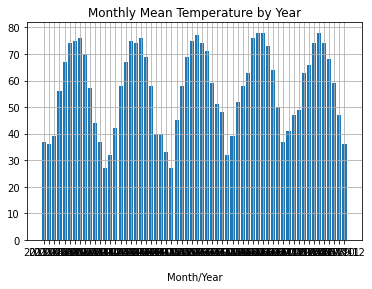

In [96]:
# Create a scatter plot latitude vs Wind Speed
plt.bar(meantemp['Date'], meantemp['Mean Temperature'])
plt.title("Monthly Mean Temperature by Year")
plt.xlabel("Month/Year", labelpad=15)
# plt.ylabel("Mean Temperature")
plt.grid()
plt.savefig("MeanTemp1.png")
plt.show()

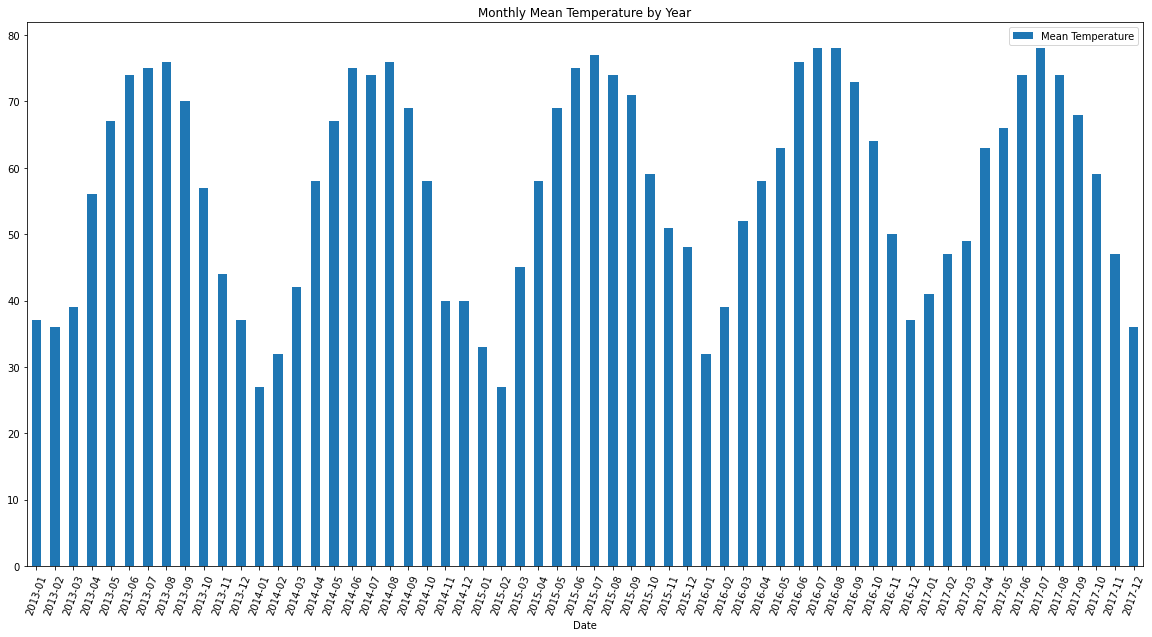

<Figure size 432x288 with 0 Axes>

In [97]:
meantemp.plot.bar(x="Date", y="Mean Temperature", figsize=(20,10), rot=70, title="Monthly Mean Temperature by Year");
plot.ylabel="Mean Temperature"
plot.show(block=True);
plot.savefig('MeanTemp.png', bbox_inches='tight')